In [1]:
import numpy as np
import pickle
from sklearn.linear_model import ElasticNetCV, LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from scipy.stats import norm
from data_generation import m_0, g_0, get_data
from dml_algorithm import mm_ate, dml_ate

In [2]:
rng = np.random.default_rng(seed=57)

In [20]:
N = 1000
y_data, d_data, x_data = get_data(N, rng)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_quad_data = poly_features.fit_transform(x_data)
scaler = StandardScaler()
x_quad_norm_data = scaler.fit_transform(x_quad_data)
y_train, y_test, d_train, d_test, x_train, x_test, x_quad_train, x_quad_test, x_quad_norm_train, x_quad_norm_test = train_test_split(y_data, d_data, x_data, x_quad_data, x_quad_norm_data, test_size=0.2, random_state=42)
x_quad_norm_data.shape

(1000, 65)

(array([0.50433979, 0.08947964, 0.04338407, 0.02440354, 0.        ,
        0.00542301, 0.0027115 , 0.        , 0.0027115 , 0.00542301]),
 array([6.66507250e-06, 1.47520258e+00, 2.95039849e+00, 4.42559441e+00,
        5.90079032e+00, 7.37598624e+00, 8.85118215e+00, 1.03263781e+01,
        1.18015740e+01, 1.32767699e+01, 1.47519658e+01]),
 <BarContainer object of 10 artists>)

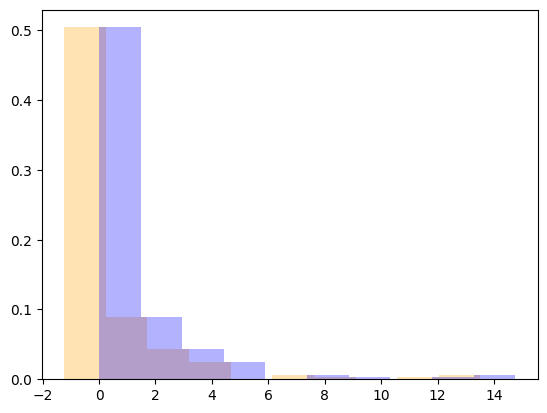

In [16]:
c=44
plt.hist(x_quad_norm_data[:,c], alpha=0.3, density=True, color='orange')
plt.hist(x_quad_data[:,c], alpha=0.3, density=True, color='blue')

In [5]:
import matplotlib.pyplot as plt

(array([ 996., 1008., 1038., 1025.,  984.,  992.,  934., 1032.,  989.,
        1002.]),
 array([-1.72394424, -1.37801215, -1.03208006, -0.68614796, -0.34021587,
         0.00571622,  0.35164831,  0.6975804 ,  1.04351249,  1.38944458,
         1.73537668]),
 <BarContainer object of 10 artists>)

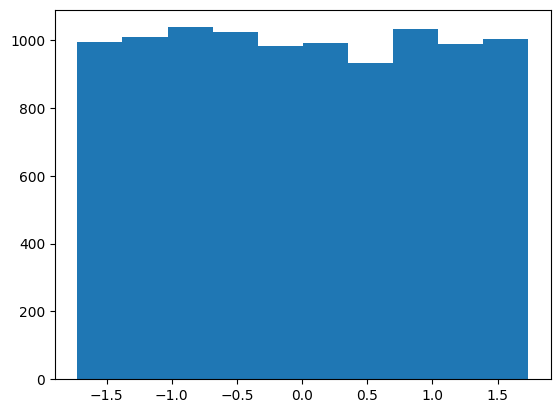

In [41]:
hi = np.random.uniform(size=10000).reshape(-1, 1)
hi = scaler.fit_transform(hi)
plt.hist(hi)

In [7]:
l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
#alphas = [0.01, 0.1, 1, 10]
model_g0, model_g1 = ElasticNetCV(l1_ratio=l1_ratio, n_alphas=50, max_iter=10000, n_jobs=-1), ElasticNetCV(l1_ratio=l1_ratio, n_alphas=50, max_iter=10000, n_jobs=-1)
model_m = LogisticRegressionCV(Cs=10, 
                               l1_ratios=[0, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 1], 
                               penalty='elasticnet',
                               solver='saga',
                               max_iter=1000,
                               random_state=42,
                               scoring='neg_brier_score',
                               n_jobs=-1
                              )
model_m_quad = LogisticRegressionCV(Cs=5, 
                               l1_ratios=[1], 
                               penalty='elasticnet',
                               solver='saga',
                               max_iter=10000,
                               random_state=42,
                               scoring='neg_brier_score',
                               n_jobs=-1
                              )

In [21]:
%%time
#model_m.fit(x_train, d_train)
#print(model_m.C_, model_m.l1_ratio_)
#print(model_m.predict_proba(x_test)[:20,1])
model_m_quad.fit(x_quad_train, d_train)
print(model_m_quad.C_[0], model_m_quad.l1_ratio_[0])
print(model_m_quad.predict_proba(x_quad_test)[:20,1])
model_m_quad.fit(x_quad_norm_train, d_train)
print(model_m_quad.C_[0], model_m_quad.l1_ratio_[0])
print(model_m_quad.predict_proba(x_quad_norm_test)[:20,1])
print(m_0(x_test[:20]))

1.0 1
[0.05084957 0.10260508 0.03517436 0.81343231 0.13241551 0.252025
 0.74323231 0.38403591 0.9923609  0.29694553 0.24158396 0.71922351
 0.63115145 0.38079454 0.02632214 0.23736442 0.36172675 0.60705095
 0.01169828 0.06464592]
1.0 1
[0.05647298 0.10251929 0.03965126 0.8371295  0.13297792 0.2471399
 0.74784344 0.41606975 0.99511313 0.28180038 0.15699713 0.7334446
 0.68606163 0.40538523 0.01898632 0.26047041 0.36500778 0.62946085
 0.01436068 0.0747097 ]
[0.19094121 0.05562018 0.17772441 0.84106411 0.14211471 0.27611265
 0.87589488 0.39017919 0.995138   0.27166083 0.15173436 0.6846341
 0.50743254 0.43833049 0.02719837 0.25025573 0.27843499 0.56488132
 0.03720034 0.08065253]
CPU times: total: 1min 3s
Wall time: 20.5 s


In [6]:
model_m_quad.intercept_

array([-0.04492515])

In [20]:
"""
%%time
model_g0.fit(x_train[d_train==0], y_train[d_train==0])
print(model_g0.alpha_, model_g0.l1_ratio_)
print(model_g0.predict(x_test[:20]))
print(g_0(0, x_test[:20]))
"""

0.002023169961802633 1.0
[ 9.11913773  1.86267306  3.38823435  3.92009905  3.71135644  8.01888979
  6.47477631  3.35071711 -2.48495728  3.26023665  4.01562794  2.40326794
  5.08584477  7.09953179  0.24808764 10.10317209  4.97710924  6.61279589
  4.84095057  8.4415757 ]
[ 9.67089239  2.52296456  2.95237173  3.3036634   3.46981129  7.25168064
  5.95556265  4.4787683  -2.17647036  2.9592268   3.37120465  2.49881907
  6.21870476  6.53252436 -0.14063823  9.19354424  4.95250245  6.55058744
  4.15508761  7.76348105]
CPU times: total: 391 ms
Wall time: 397 ms


In [22]:
%%time
model_g0.fit(x_quad_train[d_train==0], y_train[d_train==0])
print(model_g0.alpha_, model_g0.l1_ratio_)
print(model_g0.predict(x_quad_test[:20]))
model_g0.fit(x_quad_norm_train[d_train==0], y_train[d_train==0])
print(model_g0.alpha_, model_g0.l1_ratio_)
print(model_g0.predict(x_quad_norm_test[:20]))
print(g_0(0, x_test[:20]))

0.011779313039867682 1.0
[ 3.47665551  6.29318741  3.56972469  3.6112195  10.6233733   5.35372476
  3.00987209  4.57567698  2.82164391  7.42159576  9.53434301  2.9593491
  4.07140498  5.21927574 12.53541727  0.33290212  1.34669563  5.09332469
  7.09237089  6.72058213]
0.01718052691302336 1.0
[ 3.26986945  6.20808013  3.65731404  3.62399645 10.33460097  5.49698057
  2.77969468  4.61255943  2.85420606  7.68405321  9.2357822   3.04524166
  4.0413235   5.27682768 12.12907725  0.34417476  1.38196497  5.22292717
  7.11395566  6.68175934]
[2.87050247e+00 6.04771112e+00 3.50838461e+00 3.48298499e+00
 1.11742814e+01 5.37675153e+00 2.10206141e+00 4.32373641e+00
 2.51530392e+00 7.96785436e+00 9.04121830e+00 2.68711064e+00
 3.42109102e+00 5.00569728e+00 1.19191216e+01 1.18416561e-02
 1.42574611e+00 5.35639294e+00 6.96143118e+00 6.51819962e+00]
CPU times: total: 2.42 s
Wall time: 1.26 s


In [8]:
model_g0.coef_

array([ 0.44642041,  1.41112897,  1.88154013,  2.67229138,  0.78923947,
        0.09819284, -0.10155162, -0.        , -0.0356418 , -0.        ,
        0.2235204 ,  0.41034453,  0.05326671,  0.0147464 ,  0.13809821,
       -0.        , -0.17796699,  0.05022517, -0.07640268,  0.09657925,
        0.17851411,  0.        ,  0.        ,  0.        ,  0.04231927,
        0.        , -0.07673944,  0.        , -0.        , -0.10123373,
        0.        ,  0.37617951,  0.        , -0.23014066,  0.        ,
       -0.        ,  0.        , -0.02929725,  0.08134201, -0.        ,
       -0.        ,  0.        ,  0.32960906, -0.        ,  0.02195003,
        0.17823327, -0.00498887, -0.        , -0.21123816,  0.11021318,
        0.13456728,  0.        , -0.        ,  0.        ,  0.        ,
        0.3644809 , -0.        , -1.49671314, -0.        ,  0.12438415,
        0.14548096, -0.        , -0.        , -0.87326478, -0.        ])

In [22]:
"""
%%time
model_g1.fit(x_train[d_train==1], y_train[d_train==1])
print(model_g1.alpha_, model_g1.l1_ratio_)
print(model_g1.predict(x_test[:20]))
print(g_0(1, x_test[:20]))
"""

0.0016604646032669184 0.95
[ 8.53598317  4.02933957  5.30445082  5.87899583  3.18154968  9.43416427
  5.66363481  5.57276874 -1.60926805  2.97616642  3.14048025  4.77194485
  5.46062975  7.30029159  1.50686742  9.49802442  6.33179126  6.76632479
  3.56087634  7.92841459]
[ 8.44765297  4.82355923  4.62288453  5.72266669  2.47828193  8.59848846
  4.87169894  7.07646335 -1.75255434  2.34590245  2.36804108  5.45466763
  6.86649874  6.80355745  1.014024    8.8125616   6.12793833  6.2625267
  2.89036964  6.58935663]
CPU times: total: 250 ms
Wall time: 198 ms


In [19]:
%%time
model_g1.fit(x_quad_train[d_train==1], y_train[d_train==1])
print(model_g1.alpha_, model_g1.l1_ratio_)
print(model_g1.predict(x_quad_test[:20]))
model_g1.fit(x_quad_norm_train[d_train==1], y_train[d_train==1])
print(model_g1.alpha_, model_g1.l1_ratio_)
print(model_g1.predict(x_quad_norm_test[:20]))
print(g_0(1, x_test[:20]))

0.004345599182166798 1.0
[1.95079584 5.58147395 2.97474435 0.84281802 4.28659415 2.75940815
 5.63444456 6.23062068 9.85456786 5.5282271  2.54035897 6.26332402
 7.10082874 5.33435966 2.57879044 5.41830249 8.85923586 4.73546462
 6.48697261 8.01757435]
0.004345599182166798 1.0
[1.95079584 5.58147395 2.97474435 0.84281802 4.28659415 2.75940815
 5.63444456 6.23062068 9.85456786 5.5282271  2.54035897 6.26332402
 7.10082874 5.33435966 2.57879044 5.41830249 8.85923586 4.73546462
 6.48697261 8.01757435]
[7.19417313 4.97860043 2.08824457 0.20158346 5.71089704 2.20078685
 3.11779261 5.51287535 8.31304354 5.77109731 1.93485943 6.77717785
 5.07458207 5.28121456 3.76765962 5.52879989 8.31068995 4.55261125
 7.69581306 9.2279881 ]
CPU times: total: 7.44 s
Wall time: 2.41 s


In [10]:
model_g1.coef_

array([ 0.69195362,  0.89149201,  1.59609141,  2.46455314,  1.29095874,
       -0.        , -0.7615018 , -0.22761059, -0.        , -0.        ,
       -0.08802115,  0.11455706,  0.        ,  0.        ,  0.        ,
       -0.        , -0.04012475, -0.04255939,  0.        ,  0.        ,
        0.29196648,  0.19716197,  0.1207351 ,  0.44826184,  0.12097799,
       -0.        ,  0.        , -0.1743234 ,  0.        ,  0.        ,
        0.        ,  0.19326609, -0.10678429, -0.        , -0.        ,
        0.57669953,  0.        ,  0.01363198,  0.02142319,  0.        ,
       -0.        ,  0.23438096, -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.13933789,  0.        ,  0.        ,
        0.09810267, -0.20628876,  0.        , -0.        , -0.        ,
        0.58634947, -0.        , -0.22454259,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

In [11]:
%%time
model_g = [model_g0, model_g1]
dml_ate(y_data, d_data, x_quad_data, model_g, model_m_quad)

CPU times: total: 2min 2s
Wall time: 43.3 s


(array([-1.74947511,  0.2421966 ,  7.43272594]),
 24.961624140095907,
 array([-4.84369324,  1.34474302]))